<a href="https://colab.research.google.com/github/KashProgramming/djs-compute-daml-tasks/blob/main/DAML_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAML Tasks/Task2/automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Replacing all instances of "?" with NaN values so the missing data can be handled
df.replace("?",np.nan,inplace=True)

In [5]:
# Finding out percentage of null values in each column
def get_null_percentages(df,columns):
    result={}
    for col in columns:
      null_count=df[col].isnull().sum()
      total_count=len(df)
      null_percentage=(null_count/total_count)*100
      result[col]=round(null_percentage,2)
    return result
null_percentages=get_null_percentages(df,df.columns)
for column,percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

symboling: 0.0%
normalized-losses: 20.0%
make: 0.0%
fuel-type: 0.0%
aspiration: 0.0%
num-of-doors: 0.98%
body-style: 0.0%
drive-wheels: 0.0%
engine-location: 0.0%
wheel-base: 0.0%
length: 0.0%
width: 0.0%
height: 0.0%
curb-weight: 0.0%
engine-type: 0.0%
num-of-cylinders: 0.0%
engine-size: 0.0%
fuel-system: 0.0%
bore: 1.95%
stroke: 1.95%
compression-ratio: 0.0%
horsepower: 0.98%
peak-rpm: 0.98%
city-mpg: 0.0%
highway-mpg: 0.0%
price: 1.95%


In [6]:
# Typecasting the numeric attributes correctly so mean values can be filled in for null values
df["normalized-losses"]=df["normalized-losses"].astype(float)
df["bore"]=df["bore"].astype(float)
df["stroke"]=df["stroke"].astype(float)
df["horsepower"]=df["horsepower"].astype(float)
df["peak-rpm"]=df["peak-rpm"].astype(float)
df["price"]=df["price"].astype(float)
df["city-mpg"]=df["city-mpg"].astype(float)
df["highway-mpg"]=df["highway-mpg"].astype(float)
df["curb-weight"]=df["curb-weight"].astype(float)

In [7]:
numeric_cols=["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

In [8]:
def get_null_percentages(df,columns):
    result={}
    for col in columns:
      null_count=df[col].isnull().sum()
      total_count=len(df)
      null_percentage=(null_count/total_count)*100
      result[col]=round(null_percentage,2)
    return result
null_percentages=get_null_percentages(df,df.columns)
for column,percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

symboling: 0.0%
normalized-losses: 0.0%
make: 0.0%
fuel-type: 0.0%
aspiration: 0.0%
num-of-doors: 0.98%
body-style: 0.0%
drive-wheels: 0.0%
engine-location: 0.0%
wheel-base: 0.0%
length: 0.0%
width: 0.0%
height: 0.0%
curb-weight: 0.0%
engine-type: 0.0%
num-of-cylinders: 0.0%
engine-size: 0.0%
fuel-system: 0.0%
bore: 0.0%
stroke: 0.0%
compression-ratio: 0.0%
horsepower: 0.0%
peak-rpm: 0.0%
city-mpg: 0.0%
highway-mpg: 0.0%
price: 0.0%


In [9]:
df.drop_duplicates(inplace=True)
df.shape

(205, 26)

In [10]:
# Replacing categorical attribute abrevations with full form to make visualisations understandable
df["aspiration"].unique()
Aspiration={
    "std": "Standard",
    "turbo": "Turbocharged"
}
df["aspiration"]=df["aspiration"].map(Aspiration)
df["drive-wheels"].unique()
Drive={
    "rwd": "Rear-wheel",
    "fwd": "Forward-wheel",
    "4wd": "Four-wheel"
}
df["drive-wheels"]=df["drive-wheels"].map(Drive)

In [11]:
# Replacing number of doors and cylinders with numerical values instead of words
df["num-of-doors"].unique()
Number_of_doors={
    "two": 2,
    "four": 4
}
df["num-of-doors"]=df["num-of-doors"].map(Number_of_doors)
df["num-of-cylinders"].unique()
Number_of_cyl={
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "eight": 8,
    "twelve": 12
}
df["num-of-cylinders"]=df["num-of-cylinders"].map(Number_of_cyl)

In [12]:
# Replacing null values for number of doors with mode
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0],inplace=True)
df["num-of-cylinders"].fillna(df["num-of-cylinders"].mode()[0],inplace=True)

In [13]:
df["num-of-doors"]=df["num-of-doors"].astype(int)
df["num-of-cylinders"]=df["num-of-cylinders"].astype(int)

In [14]:
df.head(30)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,Standard,2,convertible,Rear-wheel,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.000000
1,3,122.0,alfa-romero,gas,Standard,2,convertible,Rear-wheel,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.000000
2,1,122.0,alfa-romero,gas,Standard,2,hatchback,Rear-wheel,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.000000
3,2,164.0,audi,gas,Standard,4,sedan,Forward-wheel,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.000000
4,2,164.0,audi,gas,Standard,4,sedan,Four-wheel,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.000000
5,2,122.0,audi,gas,Standard,2,sedan,Forward-wheel,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.000000
6,1,158.0,audi,gas,Standard,4,sedan,Forward-wheel,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.000000
7,1,122.0,audi,gas,Standard,4,wagon,Forward-wheel,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.000000
8,1,158.0,audi,gas,Turbocharged,4,sedan,Forward-wheel,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.000000
9,0,122.0,audi,gas,Turbocharged,2,hatchback,Four-wheel,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16.0,22.0,13207.129353


In [15]:
def get_null_percentages(df,columns):
    result={}
    for col in columns:
      null_count=df[col].isnull().sum()
      total_count=len(df)
      null_percentage=(null_count/total_count)*100
      result[col]=round(null_percentage,2)
    return result
null_percentages=get_null_percentages(df,df.columns)
for column,percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

symboling: 0.0%
normalized-losses: 0.0%
make: 0.0%
fuel-type: 0.0%
aspiration: 0.0%
num-of-doors: 0.0%
body-style: 0.0%
drive-wheels: 0.0%
engine-location: 0.0%
wheel-base: 0.0%
length: 0.0%
width: 0.0%
height: 0.0%
curb-weight: 0.0%
engine-type: 0.0%
num-of-cylinders: 0.0%
engine-size: 0.0%
fuel-system: 0.0%
bore: 0.0%
stroke: 0.0%
compression-ratio: 0.0%
horsepower: 0.0%
peak-rpm: 0.0%
city-mpg: 0.0%
highway-mpg: 0.0%
price: 0.0%


In [16]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [17]:
# Creating a new column Symboling_risk so the distribution of vehicles and the insurance risk can be visualised
def insurance_risk(symboling):
    if symboling>1.5:
        return "High Risk"
    elif symboling>-1.5:
        return "Moderate Risk"
    else:
        return "Low Risk"
df["Symboling_risk"] = df["symboling"].apply(insurance_risk)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Symboling_risk
0,3,122.0,alfa-romero,gas,Standard,2,convertible,Rear-wheel,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,High Risk
1,3,122.0,alfa-romero,gas,Standard,2,convertible,Rear-wheel,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,High Risk
2,1,122.0,alfa-romero,gas,Standard,2,hatchback,Rear-wheel,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,Moderate Risk
3,2,164.0,audi,gas,Standard,4,sedan,Forward-wheel,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,High Risk
4,2,164.0,audi,gas,Standard,4,sedan,Four-wheel,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,High Risk


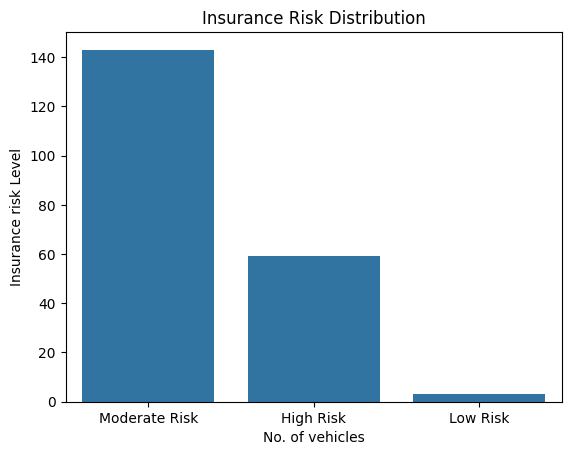

In [19]:
# Creating a countplot to see how the risk for getting insured is distributed
# Inference: More than 140 automobiles are moderately safe to get insured.
sns.countplot(x=df["Symboling_risk"],order=df["Symboling_risk"].value_counts().index)
plt.title("Insurance Risk Distribution")
plt.xlabel("No. of vehicles")
plt.ylabel("Insurance risk Level")
plt.show()

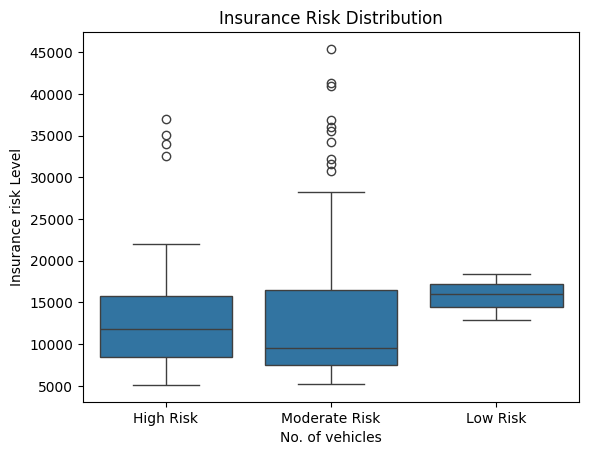

In [20]:
# Creating a boxplot to see how the risk for getting insured is distributed and the price are related
# Inference: Most outlier prices are for moderate risk vehicles. Some moderate risk vehicles are very expensive.
# The median price is higher for low risk vehicles than moderate and high risk.
# As the lowest price for low risk is still higher than medians of moderate and high risk, it can be concluded that vehicles that are the safest to insure are costliest.
sns.boxplot(y=df["price"],x=df["Symboling_risk"])
plt.title("Insurance Risk Distribution")
plt.xlabel("No. of vehicles")
plt.ylabel("Insurance risk Level")
plt.show()

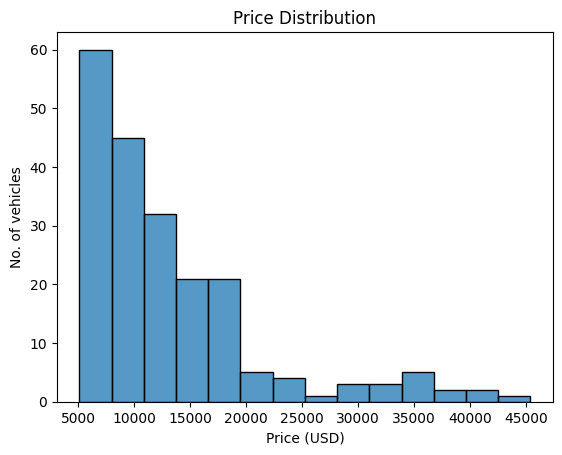

In [21]:
# Creating a histogram to show distribution of price of automobiles
# Inference: Most vehicles (almost 60) are in the price range of 5000-10000 USD. Very few vehicles have prices greater than 25000 USD
sns.histplot(df["price"])
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("No. of vehicles")
plt.show()

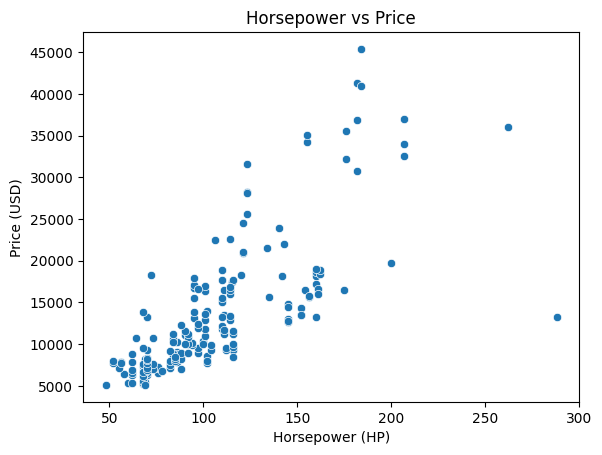

In [22]:
# Creating a scatterplot of price and horsepower to depict the relation between them
# Inference: As the graph shows, as horsepower increases, the price also increases. There's a strong positive correlation
# Vehicles with greater horsepower have better engines with more power, and so are more expensive
sns.scatterplot(x=df["horsepower"], y=df["price"])
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower (HP)")
plt.ylabel("Price (USD)")
plt.show()

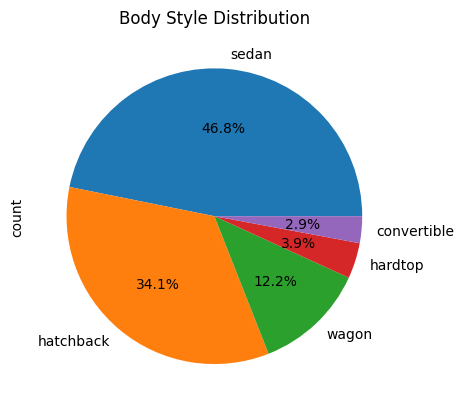

In [23]:
# Creating a pie chart to show the percentages of the different body styles of vehicles in the data
# Inference: There are 46.8% sedans in the data, which could mean it's a pretty popular body style
df["body-style"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Body Style Distribution")
plt.show()

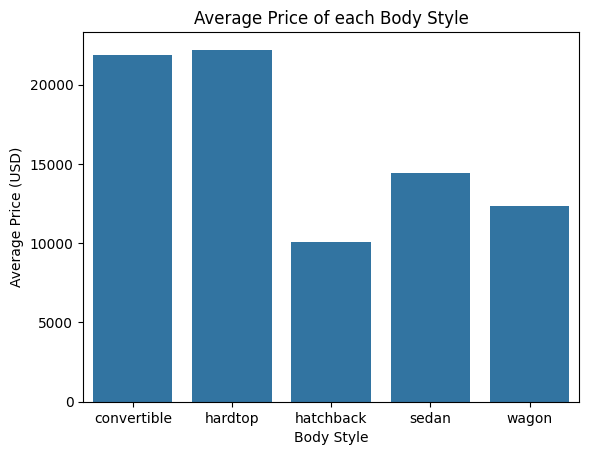

In [24]:
# Creating a barplot to compare average price of each body style
# Inference: Hardtops are the most expensive, with average price of more than 20000 USD.
# Sedans, with prices less than 15000 USD are popular because of their affordability.
body_price=df.groupby("body-style")["price"].mean().reset_index()
sns.barplot(x=body_price["body-style"],y=body_price["price"])
plt.title("Average Price of each Body Style")
plt.xlabel("Body Style")
plt.ylabel("Average Price (USD)")
plt.show()

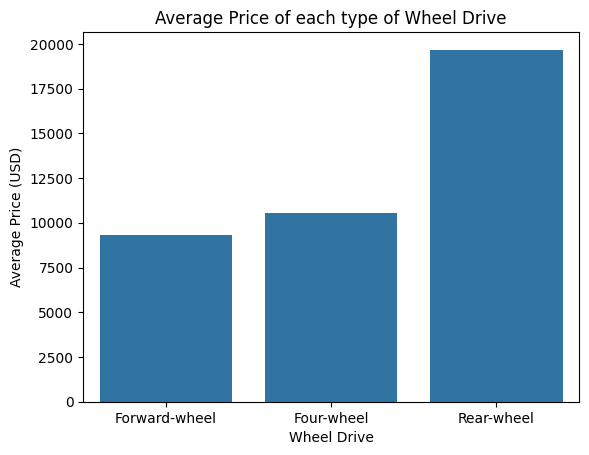

In [25]:
# Creating a barplot to compare average price of each wheel drive
# Inference: Rear-wheel are the most expensive, around average of 20000 USD.
drivetrain_price=df.groupby("drive-wheels")["price"].mean().reset_index()
sns.barplot(x=drivetrain_price["drive-wheels"],y=drivetrain_price["price"])
plt.title("Average Price of each type of Wheel Drive")
plt.xlabel("Wheel Drive")
plt.ylabel("Average Price (USD)")
plt.show()

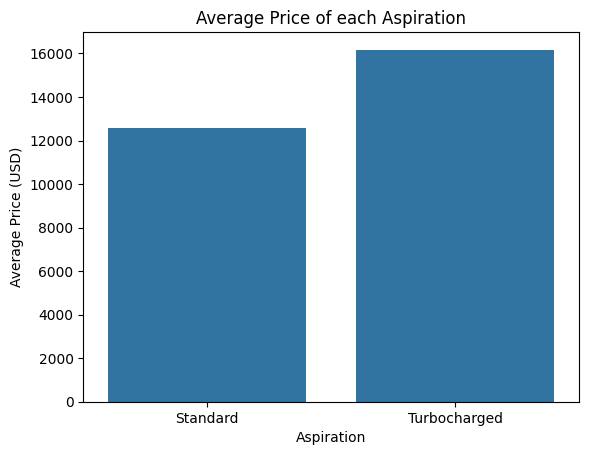

In [26]:
# Creating a barplot to compare average price of each aspiration
# Inference: Turbocharged vehicles are more expensive, with average price of around 16000 USD.
aspi_price=df.groupby("aspiration")["price"].mean().reset_index()
sns.barplot(x=aspi_price["aspiration"],y=aspi_price["price"])
plt.title("Average Price of each Aspiration")
plt.xlabel("Aspiration")
plt.ylabel("Average Price (USD)")
plt.show()

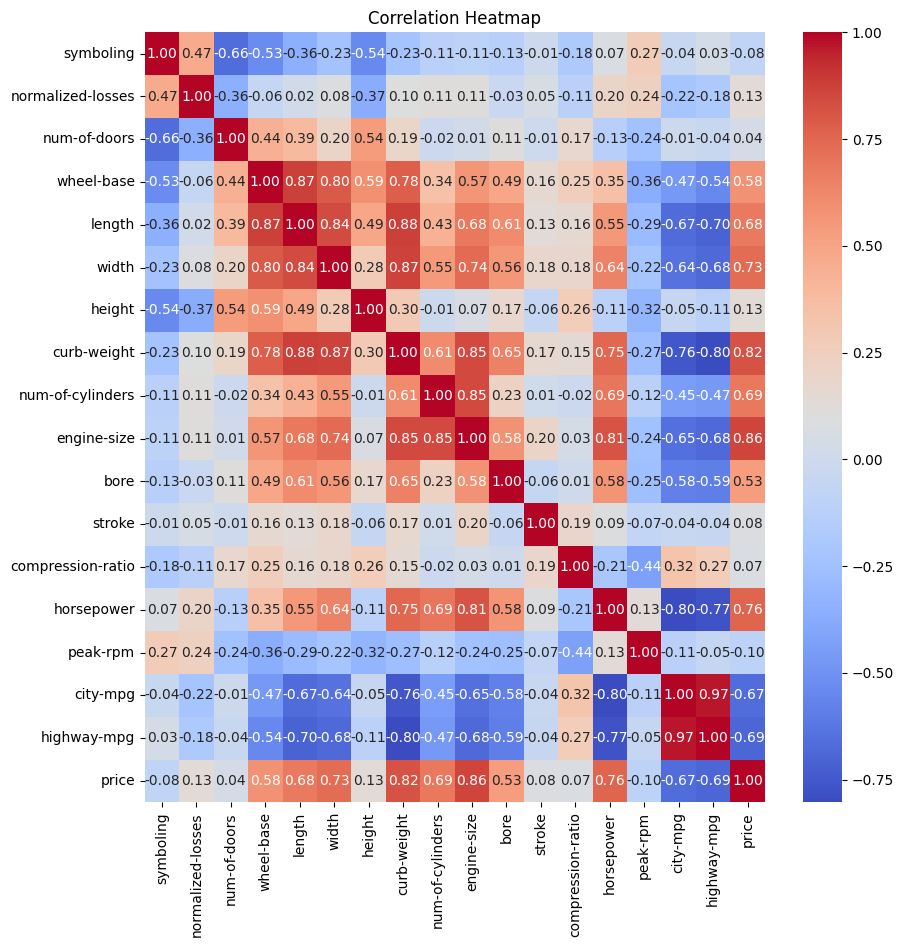

In [27]:
# Creating a heatmap to find the correlation between each and every attribute to see how they affect one another.
# Inference: by looking at the last row, we can see that the Price of an automobile has most correlation with engine-size (0.86), curb-weight (0.82) and horsepower (0.76)
# Automobiles with bigger engines, greater horsepower and more weight are more expensive.
# Price has a negative correlation with highway-mpg (-0.69) and city-mpg (-0.67). The more efficient a car's fuel usage is, the less costly it is.
plt.figure(figsize=(10,10))
numeric_df=df.select_dtypes(include=[np.number])
corr_matrix=numeric_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# As observed in the heatmap above, price has a strong positive correlation with horsepower, curb-weight and engine-size.
# It also has a negative correlation with highway-mpg and city-mpg.
# All these attributes can therefore be used in the linear regression model to help predict the value of price of an automobile as they influence the target variable - price
numeric_df.corr()["price"].sort_values()

,price
highway-mpg,-0.690526
city-mpg,-0.667449
peak-rpm,-0.100854
symboling,-0.082201
num-of-doors,0.041945
compression-ratio,0.070990
stroke,0.082095
normalized-losses,0.133999
height,0.134388
bore,0.532300


In [29]:
# Dropping columns that have very less correlation with price (according to the above values)
numeric_df.drop(columns=["num-of-doors","compression-ratio","stroke","height"],inplace=True)
numeric_df

,symboling,normalized-losses,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,88.6,168.8,64.1,2548.0,4,130,3.47,111.0,5000.0,21.0,27.0,13495.0
1,3,122.0,88.6,168.8,64.1,2548.0,4,130,3.47,111.0,5000.0,21.0,27.0,16500.0
2,1,122.0,94.5,171.2,65.5,2823.0,6,152,2.68,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,99.8,176.6,66.2,2337.0,4,109,3.19,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,99.4,176.6,66.4,2824.0,5,136,3.19,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,2952.0,4,141,3.78,114.0,5400.0,23.0,28.0,16845.0
201,-1,95.0,109.1,188.8,68.8,3049.0,4,141,3.78,160.0,5300.0,19.0,25.0,19045.0
202,-1,95.0,109.1,188.8,68.9,3012.0,6,173,3.58,134.0,5500.0,18.0,23.0,21485.0
203,-1,95.0,109.1,188.8,68.9,3217.0,6,145,3.01,106.0,4800.0,26.0,27.0,22470.0


In [30]:
# Separating target variable into y
x=numeric_df.drop(columns=["price"])
y=numeric_df["price"]

In [31]:
from sklearn.model_selection import train_test_split
# splitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)

In [32]:
# Standardising the data's features onto unit's scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.fit_transform(x_test_scaled)
principalDf=pd.DataFrame(data=x_train_pca,columns=["PC1","PC2","PC3","PC4","PC5"])

In [34]:
pca.explained_variance_ratio_

array([0.56550332, 0.19240026, 0.07598103, 0.05475097, 0.03816901])

In [35]:
cumulative_variance=np.cumsum(pca.explained_variance_ratio_)

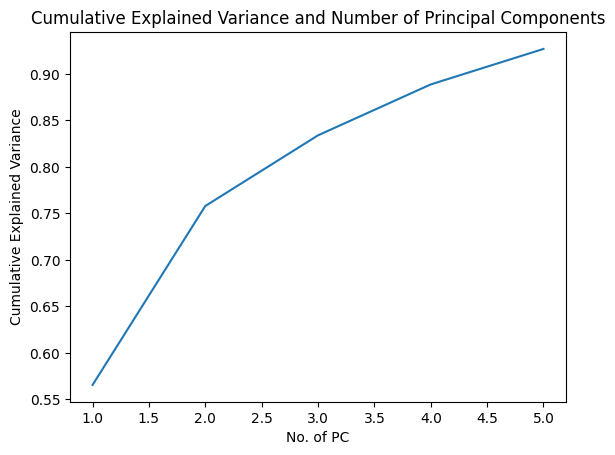

In [37]:
# Plotting cumulative explained variance with the number of principal components to find out the minimum number of principal components that will give highest cev
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance)
plt.title("Cumulative Explained Variance and Number of Principal Components")
plt.xlabel("No. of PC")
plt.ylabel("Cumulative Explained Variance")
plt.show()

<ipython-input-38-3feff216e77a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_train_pca[:,0],x_train_pca[:,1],cmap=plt.cm.get_cmap("Spectral",10))
<ipython-input-38-3feff216e77a>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train_pca[:,0],x_train_pca[:,1],cmap=plt.cm.get_cmap("Spectral",10))


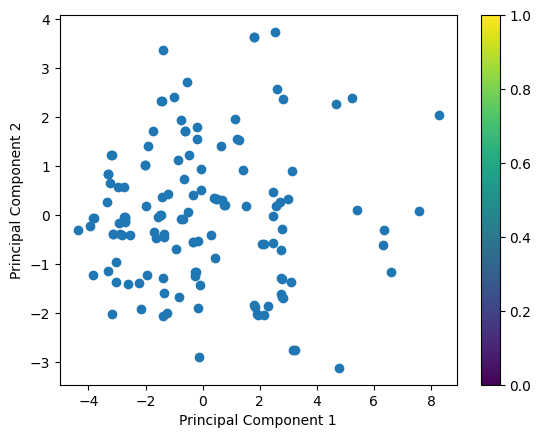

In [38]:
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],cmap=plt.cm.get_cmap("Spectral",10))
plt.colorbar()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# creating a linear regression model
model=LinearRegression()
# fitting the x_train data with pca done along with y_train data
model.fit(x_train_pca,y_train)
# predicting y (price) data using the x_test data. so we're getting the model to predict the price of unseen automobiles' data
y_pred=model.predict(x_test_pca)
# evaluating the model by calculating key metrics like mean absolute error, mean squared error, root mean squared error and r-squared
mean_absolute_error=mean_absolute_error(y_test,y_pred)
mean_squared_error=mean_squared_error(y_test,y_pred)
root_mean_squared_error=np.sqrt(mean_squared_error)
r2=r2_score(y_test,y_pred)

In [40]:
print(f"Mean absolute error = {mean_absolute_error}")
print(f"Mean squared error = {mean_squared_error}")
print(f"Root mean squared error = {root_mean_squared_error}")
print(f"R-squared = {r2}")

Mean absolute error = 3498.608765091515
Mean squared error = 23357175.1573252
Root mean squared error = 4832.926148548641
R-squared = 0.6313297908139152


In [41]:
import pickle

In [42]:
pickle.dump(model,open("/content/automobile_price_predict.pkl","wb"))

In [43]:
pickle.dump(scaler,open("/content/scaler.pkl","wb"))

In [44]:
pickle.dump(pca,open("/content/pca.pkl","wb"))